In [2]:
import turicreate as tc

# Importing of Dataset and Reading its contents

In [3]:
sf=tc.SFrame("amazon_baby.sframe")

In [4]:
sf

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0
Stop Pacifier Suckingwithout tears with ...,This is a product wellworth the purchase. I ...,5.0
Stop Pacifier Suckingwithout tears with ...,All of my kids have criednon-stop when I tried to ...,5.0
Stop Pacifier Suckingwithout tears with ...,"When the Binky Fairy cameto our house, we didn't ...",5.0
A Tale of Baby's Dayswith Peter Rabbit ...,"Lovely book, it's boundtightly so you may no ...",4.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",Perfect for new parents.We were able to keep ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",A friend of mine pinnedthis product on Pinte ...,5.0
"Baby Tracker&reg; - DailyChildcare Journal, ...",This has been an easy wayfor my nanny to record ...,4.0


# Visualization of dataset contents

In [4]:
sf['rating'].show()

Materializing SArray

In [5]:
tc.show(sf['name'],sf['rating'])

Materializing X axis SArray

Materializing Y axis SArray

In [6]:
sf.explore()

/home/aritrik/.local/lib/python3.6/site-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))


,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion not worth keeping. I also ordered someImse Vimse Cloth Wipes-Ocean Blue-12 countwhich are larger, had a nicer, softer texture and just seemed higher quality. I use cloth wipes for hands and faces and have been usingThirsties 6 Pack Fab Wipes, Boyfor about 8 months now and need to replace them because they are starting to get rough and have had stink issues for a while that stripping no longer handles.",3.0
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love planet wise bags and now my wipe holder. it keps my osocozy wipes moist and does not leak. highly recommend it.,5.0
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it looks...fit the full size bed perfectly...would recommend to anyone looking for this type of quilt,5.0
3,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,"This is a product well worth the purchase. I have not found anything else like this, and it is a positive, ingenious approach to losing the binky. What I love most about this product is how much ownership my daughter has in getting rid of the binky. She is so proud of herself, and loves her little fairy. I love the artwork, the chart in the back, and the clever approach of this tool.",5.0
4,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,"All of my kids have cried non-stop when I tried to ween them off their pacifier, until I found Thumbuddy To Love's Binky Fairy Puppet. It is an easy way to work with your kids to allow them to understand where their pacifier is going and help them part from it.This is a must buy book, and a great gift for expecting parents!! You will save them soo many headaches.Thanks for this book! You all rock!!",5.0
5,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,"When the Binky Fairy came to our house, we didn't have any special gift and book to help explain to her about how important it is to stop using a pacifier. This book does a great job to help prepare your child for the loss of their favorite item. The doll is adorable and we made lots of cute movies with the Binky Fairy telling our daughter about what happens when the Binky Fairy comes. I would highly recommend this product for any parent trying to break the pacifier or thumb sucking habit.",5.0
6,A Tale of Baby's Days with Peter Rabbit,"Lovely book, it's bound tightly so you may not be able to add alot of photos/cards aside from the designated spaces in the book. Shop around before you purchase, as it is currently listed at Barnes & Noble for 29.95!",4.0
7,"Baby Tracker® - Daily Childcare Journal, Schedule Log","Perfect for new parents. We were able to keep track of baby's feeding, sleep and diaper change schedule for the first two and a half months of her life. Made life easier when the doctor would ask questions about habits because we had it all right there!",5.0
8,"Baby Tracker® - Daily Childcare Journal, Schedule Log","A friend of mine pinned this product on Pinterest so I decided to give it a whirl! It is fantastic! If you are a new parent, this will help you keep track of feedings, diaper changes and the like!",5.0
9,"Baby Tracker® - Daily Childcare Journal, Schedule Log",This has been an easy way for my nanny to record all the key events that happen with my baby when I'm not at home. Would highly recommend it to someone who wants to stay informed of what your baby is up to while you're not home.The only reason this isn't a 5 is because I think there could have been some more standarad pre-printed options.I plan on ordering another one when we run out of pages in this journal.,4.0


In [7]:
tc.visualization.columnwise_summary(sf)

Materializing SFrame

## Building the word count vector for each review

In [5]:
sf['word_count']=tc.text_analytics.count_words(sf['review'])

In [6]:
sf.explore(title='Amazon reviews')

/home/aritrik/.local/lib/python3.6/site-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))


,name,review,rating,word_count
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion not worth keeping. I also ordered someImse Vimse Cloth Wipes-Ocean Blue-12 countwhich are larger, had a nicer, softer texture and just seemed higher quality. I use cloth wipes for hands and faces and have been usingThirsties 6 Pack Fab Wipes, Boyfor about 8 months now and need to replace them because they are starting to get rough and have had stink issues for a while that stripping no longer handles.",3.0,"{'handles': 1.0, 'stripping': 1.0, 'while': 1.0, 'stink': 1.0, 'issues': 1.0, 'rough': 1.0, 'get': 1.0, 'they': 1.0, 'replace': 1.0, 'to': 2.0, 'need': 1.0, 'now': 1.0, 'months': 1.0, 'countwhich': 1.0, 'but': 1.0, 'ocean': 1.0, 'blue': 1.0, 'vimse': 1.0, 'larger': 1.0, 'ordered': 1.0, 'worth': 1.0, 'also': 1.0, 'in': 1.0, 'them': 1.0, 'quality': 1.0, 'softer': 1.0, 'cloth': 2.0, 'keeping': 1.0, 'use': 1.0, 'these': 1.0, 'flannel': 1.0, 'wipes': 4.0, 'not': 1.0, 'just': 1.0, 'ok': 1.0, 'my': 1.0, '12': 1.0, 'had': 2.0, 'someimse': 1.0, 'a': 2.0, 'i': 2.0, 'texture': 1.0, 'starting': 1.0, 'and': 5.0, 'because': 1.0, 'boyfor': 1.0, 'seemed': 1.0, 'fab': 1.0, 'higher': 1.0, 'opinion': 1.0, 'for': 2.0, 'nicer': 1.0, 'are': 3.0, 'usingthirsties': 1.0, 'hands': 1.0, 'have': 2.0, 'pack': 1.0, 'longer': 1.0, '8': 1.0, 'that': 1.0, 'been': 1.0, '6': 1.0, 'no': 1.0, 'faces': 1.0, 'about': 1.0}"
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love planet wise bags and now my wipe holder. it keps my osocozy wipes moist and does not leak. highly recommend it.,5.0,"{'recommend': 1.0, 'highly': 1.0, 'disappointed': 1.0, 'love': 1.0, 'it': 3.0, 'planet': 1.0, 'and': 3.0, 'bags': 1.0, 'wipes': 1.0, 'not': 2.0, 'early': 1.0, 'came': 1.0, 'i': 1.0, 'does': 1.0, 'wise': 1.0, 'my': 2.0, 'was': 1.0, 'now': 1.0, 'wipe': 1.0, 'holder': 1.0, 'leak': 1.0, 'keps': 1.0, 'osocozy': 1.0, 'moist': 1.0}"
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it looks...fit the full size bed perfectly...would recommend to anyone looking for this type of quilt,5.0,"{'quilt': 1.0, 'of': 1.0, 'the': 1.0, 'than': 1.0, 'fit': 1.0, 'warmer': 1.0, 'this': 1.0, 'it': 1.0, 'perfectly': 1.0, 'and': 2.0, 'very': 1.0, 'looks': 1.0, 'type': 1.0, 'soft': 1.0, 'size': 1.0, 'looking': 1.0, 'full': 1.0, 'recommend': 1.0, 'would': 1.0, 'to': 1.0, 'anyone': 1.0, 'comfortable': 1.0, 'bed': 1.0, 'for': 1.0}"
3,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,"This is a product well worth the purchase. I have not found anything else like this, and it is a positive, ingenious approach to losing the binky. What I love most about this product is how much ownership my daughter has in getting rid of the binky. She is so proud of herself, and loves her little fairy. I love the artwork, the chart in the back, and the clever approach of this tool.",5.0,"{'tool': 1.0, 'clever': 1.0, 'approach': 2.0, 'positive': 1.0, 'and': 3.0, 'getting': 1.0, 'like': 1.0, 'else': 1.0, 'so': 1.0, 'not': 1.0, 'fairy': 1.0, 'to': 1.0, 'anything': 1.0, 'is': 4.0, 'back': 1.0, 'herself': 1.0, 'the': 7.0, 'worth': 1.0, 'this': 4.0, 'found': 1.0, 'ingenious': 1.0, 'most': 1.0, 'i': 3.0, 'have': 1.0, 'binky': 2.0, 'well': 1.0, 'has': 1.0, 'what': 1.0, 'chart': 1.0, 'her': 1.0, 'product': 2.0, 'love': 2.0, 'about': 1.0, 'how': 1.0, 'much': 1.0, 'ownership': 1.0, 'purchase': 1.0, 'my': 1.0, 'artwork': 1.0, 'daughter': 1.0, 'in': 2.0, 'rid': 1.0, 'of': 3.0, 'it': 1.0, 'she': 1.0, 'losing': 1.0, 'a': 2.0, 'proud': 1.0, 'loves': 1.0, 'little': 1.0}"
4,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,"All of my kids have cried non-stop when I tried to ween them off their pacifier, until I found Thumbuddy To Love's Binky Fairy Puppet. It is an easy way to work with your kids to allow them to understand where their pacifier is going and help them part from it.This is a must bu

### Finding the most reviewed product

In [10]:
tc.visualization.item_frequency(sf['name'])

Materializing SArray

#### Hereby, we find that the most reviewed product is - Vulli Sophie the Giraffe Teether

## Analyzing the maximum viewed product

In [7]:
top_prod=sf[sf['name']=='Vulli Sophie the Giraffe Teether']

In [8]:
len(top_prod)

785

In [9]:
top_prod

name,review,rating,word_count
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ..."
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ..."
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ..."
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ..."
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ..."
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ..."
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,"{'off': 1.0, 'have': 2.0,'of': 1.0, 'some': 1.0, ..."


In [14]:
tc.visualization.set_target('auto')
top_prod['rating'].show()

Materializing SArray

In [15]:
sf['rating'].show()

Materializing SArray

##### Here we can see that more people have liked amazon products, by judjing the count of amazon ratings

### Defining positive and negative sentiment

In [11]:
sf['sentiment']=sf['rating']>=3

In [12]:
sf[sf['rating']<3]

name,review,rating,word_count,sentiment
Nature's Lullabies SecondYear Sticker Calendar ...,I only purchased asecond-year calendar for ...,2.0,"{'purchasers': 1.0,'future': 1.0, 'other': ...",0
"SoftPlay Giggle JiggleFunbook, Happy Bear ...",This bear is absolutelyadorable and I would ...,2.0,"{'granddaughter': 1.0,'kenzie': 1.0, 'my': ...",0
"SoftPlay Cloth Book, Love",This book is boring.Nothing to stimulate my ...,1.0,"{'i': 1.0, 'recommend':1.0, 'of': 1.0, 'waste': ...",0
Hunnt&reg; FallingFlowers and Birds Kids ...,The reason:Small sizeHardto apply on the wall ...,1.0,"{'roll': 1.0, 'floor':1.0, 'fell': 1.0, 'all': ...",0
Wall Decor RemovableDecal Sticker - Colorful ...,Would not purchase againor recommend. The decals ...,2.0,"{'peeling': 1.0, '5':1.0, 'about': 1.0, 'f ...",0
Cloth Diaper PinsStainless Steel ...,These were good quality--worked fine--heavy ...,2.0,"{'others': 1.0, 'to':1.0, 'be': 1.0, 'able': ...",0
Cloth Diaper PinsStainless Steel ...,"While the diaper pins areattractive, the metal in ...",2.0,"{'little': 1.0, 'so':1.0, 'baby': 1.0, 'no': ...",0
Cloth Diaper PinsStainless Steel ...,"The steel part is notstrong at all, unlike ...",1.0,"{'recommend': 1.0,'would': 1.0, 'thicker': ...",0
Cloth Diaper PinsStainless Steel ...,I really thought I wasgetting a dozen ...,2.0,"{'be': 1.0, 'back': 1.0,'will': 1.0, 'so': 1.0, ...",0
Super Mario Game NintendoWall Sticker and Decal ...,These do not stick to thewall. They start to peel ...,1.0,"{'them': 1.0, 'you': 1.0,'soon': 1.0, 'as': 2.0, ...",0


## Model Building

In [13]:
train_data, test_data= sf.random_split(0.8,seed=0)

In [14]:
sentiment_model=tc.logistic_classifier.create(train_data,features=['word_count'],target='sentiment',validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 146861

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 60789

Number of coefficients      : 60790

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 1.968620     | 0.855047          | 0.858140            |

| 1         | 9        | 3.250000  | 3.274867     | 0.912843          | 0.896428            |

| 2         | 11       | 2.836451  | 3.903819     | 0.925596          | 0.900518            |

| 3         | 12       | 2.836451  | 4.399741     | 0.915723          | 0.893510            |

| 4         | 15       | 1.140864  | 5.429756     | 0.932596          | 0.906136            |

| 9         | 20       | 1.140864  | 7.558806     | 0.963823          | 0.900245            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

### Evaluation of model

In [15]:
ev=sentiment_model.evaluate(test_data)
ev

{'accuracy': 0.9002454322334333,
 'auc': 0.9043141603191877,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  1729 |
 |      0       |        0        |  3273 |
 |      0       |        1        |  1929 |
 |      1       |        1        | 29739 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9420615813482006,
 'log_loss': 0.3535332882942096,
 'precision': 0.9390867752936718,
 'recall': 0.945055294267192,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0

In [21]:
tc.evaluation.roc_curve(targets=test_data['sentiment'], predictions=sentiment_model.predict(test_data), average=None, index_map=None)

threshold,fpr,tpr,p,n
0.0,1.0,1.0,31468,5202
1e-05,0.37081891580161475,0.945055294267192,31468,5202
2e-05,0.37081891580161475,0.945055294267192,31468,5202
3e-05,0.37081891580161475,0.945055294267192,31468,5202
4e-05,0.37081891580161475,0.945055294267192,31468,5202
5e-05,0.37081891580161475,0.945055294267192,31468,5202
6e-05,0.37081891580161475,0.945055294267192,31468,5202
7e-05,0.37081891580161475,0.945055294267192,31468,5202
8e-05,0.37081891580161475,0.945055294267192,31468,5202
9e-05,0.37081891580161475,0.945055294267192,31468,5202


## Prediction/Classification of test sets

In [22]:
sentiment_model.classify(test_data)

class,probability
1,0.9933861074706324
1,0.9999999261339546
1,0.9999889988412148
1,0.9995879730930582
1,0.9997202672369552
1,0.9962002812009333
1,0.9815309097202438
1,0.9929822515357754
1,0.9996240754556286
1,0.9992914189407721


In [23]:
sentiment_model.summary()

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 60790
Number of examples             : 146861
Number of classes              : 2
Number of feature columns      : 1
Number of unpacked features    : 60789

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : lbfgs
Solver iterations              : 10
Solver status                  : Completed (Iteration limit reached).
Training time (sec)            : 5.3515

Settings
--------
Log-likelihood                 : 15620.9079

Highest Positive Coefficients
-----------------------------
word_count[cityselect]         : 32.4231
word_count[aramaic]            : 27.6527
word_count[arghhhhhh]          : 23.3866
word_count[arthitis]           : 23.1354
word_count[snoogles]           : 21.7975

Lowest Negative Coefficients
----------------------------
word_count[superibibs]       

In [24]:
sentiment_model.predict(test_data)

dtype: int
Rows: 36670
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, ... ]

In [16]:
a1=tc.SArray(test_data['sentiment'])

In [17]:
a2=tc.SArray(sentiment_model.predict(test_data))

In [18]:
data = {'predicted value':a2, 'real value':a1} 

In [19]:
import pandas as pd
z=tc.SFrame(pd.DataFrame(data))

In [20]:
z

predicted value,real value
1,1
1,1
1,1
1,1
1,1
1,1
1,0
1,1
1,1
1,1


### Plot evaluation/ROC curve

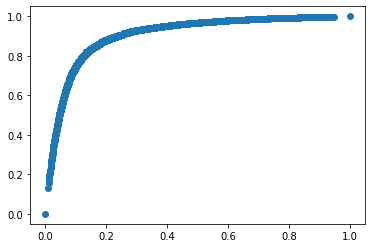

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(ev['roc_curve']['fpr'], ev['roc_curve']['tpr'])

### Comparing predictions for top reviewed product

In [22]:
top_prod['predicted_sentiment']=sentiment_model.predict(top_prod,output_type='probability')
top_prod

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ...",0.997754600105265
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ...",0.9995869440486701
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ...",0.010236464655911354
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ...",0.9904051935071466
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ...",0.645099200827975
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ...",0.9999954146623227
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ...",0.9682481908083412
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ...",0.9991840697729264
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ...",0.8836121590765207
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,"{'off': 1.0, 'have': 2.0,'of': 1.0, 'some': 1.0, ...",0.9942131597584787


## Sort reviews based on predicted sentiment

In [23]:
top_prod=top_prod.sort('predicted_sentiment',ascending=False)

In [24]:
top_prod.explore()

/home/aritrik/.local/lib/python3.6/site-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))


,name,review,rating,word_count,predicted_sentiment
0,Vulli Sophie the Giraffe Teether,"I'll be honest...I bought this toy because all the hip parents seem to have one too and I wanted to be a part of the ""hip parent"" crowd. The price-tag was somewhat of a deterent but I prevailed and purchased this teether for my daughter.At first, Lily didn't know what to make of of Sophie and showed little interest in the polka-dotted creature. I continued to introduce Lily to Sophie and kept the toy in the carrier so that it was on-hand during transitions. Eventually, Lily discovered what a wonderful experience it was to gnaw on the hooves and ears and these two have never been far apart since.Lily really enjoys gumming all the different parts of Sophie like no other teether we have. The size of the toy is great as it is somewhat substantial and so easy for a little one to grasp and hold onto. Lily really enjoys hearing Sophie squeak and will smile whenever Sophie makes a noise or pops her head up from Mommy's lap to say hello.People have stopped and commented on Sophie and to them I have stated, ""It's worth every penny."" I can't imagine not having this toy, it has become part and parcel with Lily's daily existence. She is soothed by it, loves to chew on it and seems endlessly entertained by it.Someday, Sophie will have earned her retirement. She will relocate to Lily's keepsake box. But until then, this little French Giraffe will embark on many adventures alongside my daughter as they explore this big world around them.",4.0,"{'around': 1.0, 'explore': 1.0, 'they': 1.0, 'adventures': 1.0, 'giraffe': 1.0, 'box': 1.0, 'relocate': 1.0, 'earned': 1.0, 'someday': 1.0, 'entertained': 1.0, 'until': 1.0, 'seems': 1.0, 'loves': 1.0, 'by': 2.0, 'soothed': 1.0, 'many': 1.0, 'she': 2.0, 'existence': 1.0, 'daily': 1.0, 'with': 1.0, 'having': 1.0, 'not': 1.0, 'every': 1.0, 'worth': 1.0, 'stopped': 1.0, 'alongside': 1.0, 'people': 1.0, 'hello': 1.0, 'mommy': 1.0, 'penny': 1.0, 'up': 1.0, 'head': 1.0, 'pops': 1.0, 'world': 1.0, 'or': 1.0, 'noise': 1.0, 'makes': 1.0, 'retirement': 1.0, 'whenever': 1.0, 'smile': 1.0, 'will': 4.0, 'make': 1.0, 'on': 5.0, 'lily': 7.0, 'lap': 1.0, 'since': 1.0, 'my': 2.0, 'didn': 1.0, 'eventually': 1.0, 'what': 2.0, 'purchased': 1.0, 'prevailed': 1.0, 'deterent': 1.0, 'different': 1.0, 'somewhat': 2.0, 'showed': 1.0, 'parents': 1.0, 'big': 1.0, 'french': 1.0, 'crowd': 1.0, 's': 4.0, 'grasp': 1.0, 'hand': 1.0, 'like': 1.0, 'hold': 1.0, 'commented': 1.0, 'price': 1.0, 'become': 1.0, 'squeak': 1.0, 'toy': 4.0, 'parent': 1.0, 'this': 5.0, 'from': 1.0, 'sophie': 7.0, 't': 2.0, 'imagine': 1.0, 'a': 5.0, 'then': 1.0, 'we': 1.0, 'be': 2.0, 'dotted': 1.0, 'endlessly': 1.0, 'discovered': 1.0, 'gumming': 1.0, 'bought': 1.0, 'll': 1.0, 'chew': 1.0, 'teether': 2.0, 'to': 11.0, 'as': 2.0, 'have': 6.0, 'honest': 1.0, 'her': 2.0, 'tag': 1.0, 'hearing': 1.0, 'i': 7.0, 'introduce': 1.0, 'parcel': 1.0, 'hip': 2.0, 'daughter': 2.0, ...}",1.000000
1,Vulli Sophie the Giraffe Teether,"As a mother of 16month old twins; I bought Sophie [1 for each, of course] when they were 4 months old after careful reading of all reviews. I heard great things about Sophie and wanted to give her a try. At 4 months babies can't do much more than grasp and semi gnaw on Sophie. For many months I had to squeeze Sophie myself [which I personally enjoyed] and set it on their laps. They LOVED Sophie. The squeak is LOUD and sounds exactly like a dog's squeaky chew toy, just for those who are wondering.As they grew and their motor skills developed to each milestone, Sophie gained more and more individual babytime. The twins were able to squeeze her themselves and chew on her around the clock. They love to throw her, stretch her, squeeze her, chew on her, drool on her... you name it, they have done it. One of the two Sophie's took an extended vacation out in the back yard [unbeknownst to me] and once found, a little water had her looking like a champ again... ready to face

In [25]:
top_prod.tail(1)

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,I got one of these as ashowe gift that my baby ...,1.0,"{'typical': 1.0, 'paint':1.0, 'came': 1.0, 'mi ...",3.002142922050749e-13


## Select few words, and count their appearnance in reviews

In [26]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [27]:
sf.explore()

/home/aritrik/.local/lib/python3.6/site-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))


,name,review,rating,word_count,sentiment
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion not worth keeping. I also ordered someImse Vimse Cloth Wipes-Ocean Blue-12 countwhich are larger, had a nicer, softer texture and just seemed higher quality. I use cloth wipes for hands and faces and have been usingThirsties 6 Pack Fab Wipes, Boyfor about 8 months now and need to replace them because they are starting to get rough and have had stink issues for a while that stripping no longer handles.",3.0,"{'handles': 1.0, 'stripping': 1.0, 'while': 1.0, 'stink': 1.0, 'issues': 1.0, 'rough': 1.0, 'get': 1.0, 'they': 1.0, 'replace': 1.0, 'to': 2.0, 'need': 1.0, 'now': 1.0, 'months': 1.0, 'countwhich': 1.0, 'but': 1.0, 'ocean': 1.0, 'blue': 1.0, 'vimse': 1.0, 'larger': 1.0, 'ordered': 1.0, 'worth': 1.0, 'also': 1.0, 'in': 1.0, 'them': 1.0, 'quality': 1.0, 'softer': 1.0, 'cloth': 2.0, 'keeping': 1.0, 'use': 1.0, 'these': 1.0, 'flannel': 1.0, 'wipes': 4.0, 'not': 1.0, 'just': 1.0, 'ok': 1.0, 'my': 1.0, '12': 1.0, 'had': 2.0, 'someimse': 1.0, 'a': 2.0, 'i': 2.0, 'texture': 1.0, 'starting': 1.0, 'and': 5.0, 'because': 1.0, 'boyfor': 1.0, 'seemed': 1.0, 'fab': 1.0, 'higher': 1.0, 'opinion': 1.0, 'for': 2.0, 'nicer': 1.0, 'are': 3.0, 'usingthirsties': 1.0, 'hands': 1.0, 'have': 2.0, 'pack': 1.0, 'longer': 1.0, '8': 1.0, 'that': 1.0, 'been': 1.0, '6': 1.0, 'no': 1.0, 'faces': 1.0, 'about': 1.0}",1
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love planet wise bags and now my wipe holder. it keps my osocozy wipes moist and does not leak. highly recommend it.,5.0,"{'recommend': 1.0, 'highly': 1.0, 'disappointed': 1.0, 'love': 1.0, 'it': 3.0, 'planet': 1.0, 'and': 3.0, 'bags': 1.0, 'wipes': 1.0, 'not': 2.0, 'early': 1.0, 'came': 1.0, 'i': 1.0, 'does': 1.0, 'wise': 1.0, 'my': 2.0, 'was': 1.0, 'now': 1.0, 'wipe': 1.0, 'holder': 1.0, 'leak': 1.0, 'keps': 1.0, 'osocozy': 1.0, 'moist': 1.0}",1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it looks...fit the full size bed perfectly...would recommend to anyone looking for this type of quilt,5.0,"{'quilt': 1.0, 'of': 1.0, 'the': 1.0, 'than': 1.0, 'fit': 1.0, 'warmer': 1.0, 'this': 1.0, 'it': 1.0, 'perfectly': 1.0, 'and': 2.0, 'very': 1.0, 'looks': 1.0, 'type': 1.0, 'soft': 1.0, 'size': 1.0, 'looking': 1.0, 'full': 1.0, 'recommend': 1.0, 'would': 1.0, 'to': 1.0, 'anyone': 1.0, 'comfortable': 1.0, 'bed': 1.0, 'for': 1.0}",1
3,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,"This is a product well worth the purchase. I have not found anything else like this, and it is a positive, ingenious approach to losing the binky. What I love most about this product is how much ownership my daughter has in getting rid of the binky. She is so proud of herself, and loves her little fairy. I love the artwork, the chart in the back, and the clever approach of this tool.",5.0,"{'tool': 1.0, 'clever': 1.0, 'approach': 2.0, 'positive': 1.0, 'and': 3.0, 'getting': 1.0, 'like': 1.0, 'else': 1.0, 'so': 1.0, 'not': 1.0, 'fairy': 1.0, 'to': 1.0, 'anything': 1.0, 'is': 4.0, 'back': 1.0, 'herself': 1.0, 'the': 7.0, 'worth': 1.0, 'this': 4.0, 'found': 1.0, 'ingenious': 1.0, 'most': 1.0, 'i': 3.0, 'have': 1.0, 'binky': 2.0, 'well': 1.0, 'has': 1.0, 'what': 1.0, 'chart': 1.0, 'her': 1.0, 'product': 2.0, 'love': 2.0, 'about': 1.0, 'how': 1.0, 'much': 1.0, 'ownership': 1.0, 'purchase': 1.0, 'my': 1.0, 'artwork': 1.0, 'daughter': 1.0, 'in': 2.0, 'rid': 1.0, 'of': 3.0, 'it': 1.0, 'she': 1.0, 'losing': 1.0, 'a': 2.0, 'proud': 1.0, 'loves': 1.0, 'little': 1.0}",1
4,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,"All of my kids have cried non-stop when I tried to ween them off their pacifier, until I found Thumbuddy To Love's Binky Fairy Puppet. It is an easy way to work with your kids to allow them to understand where their pacifier is going and help them part from it

In [28]:
def w_count(dict,i):
        if i in dict:
            return dict[i]
        else:
            return 0   

In [29]:
for i in selected_words:
    sf[i] = sf['word_count'].apply(lambda x:w_count(x,i))

In [39]:
s=[]
for i in selected_words:
    s.append(sf[i].sum())

In [41]:
data2 = {'words':selected_words, 'appearance in reviews':s} 
z2=tc.SFrame(pd.DataFrame(data2))

In [45]:
z2[z2['appearance in reviews']==z2['appearance in reviews'].max()]

words,appearance in reviews
great,59536.0


In [46]:
z2[z2['appearance in reviews']==z2['appearance in reviews'].min()]

words,appearance in reviews
wow,461.0


## Sentiment Analysis using selected words

In [48]:
train_set,test_set = sf.random_split(.8, seed=0)

In [50]:
sentiment_model2=tc.logistic_classifier.create(train_set,features=selected_words,target='sentiment',validation_set=test_set)

Logistic regression:

--------------------------------------------------------

Number of examples          : 146861

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients      : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.189316     | 0.859153          | 0.861467            |

| 2         | 3        | 0.318901     | 0.859268          | 0.861685            |

| 3         | 4        | 0.414702     | 0.859187          | 0.861767            |

| 4         | 5        | 0.516956     | 0.859180          | 0.861740            |

| 5         | 6        | 0.617463     | 0.859180          | 0.861740            |

| 6         | 7        | 0.726086     | 0.859180          | 0.861740            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

 ## Examining the weights the learned classifier assigned to each of the words in selected_words and gain intuition as to what the ML algorithm did for the data using these features

In [60]:
coeff=sentiment_model2.coefficients

In [62]:
coeff=coeff.sort('value',ascending=False)

name,index,class,value,stderr
(intercept),None,1,1.4750664001235845,0.008748527967756738
love,None,1,1.2921737251045347,0.027887829861924215
awesome,None,1,1.0869118827241708,0.08466709293952149
amazing,None,1,1.029329148703112,0.10073541146190426
fantastic,None,1,0.9248972519581653,0.11677017183656911
great,None,1,0.8128092717624683,0.018738211073787286
wow,None,1,-0.1577624006730732,0.13711353218000374
bad,None,1,-0.8175390634084442,0.0359859017652875
hate,None,1,-1.2248111052098698,0.07070491410308596
awful,None,1,-1.9276744507795542,0.0925987902838704


In [63]:
sentiment_model2.summary()

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 12
Number of examples             : 146861
Number of classes              : 2
Number of feature columns      : 11
Number of unpacked features    : 11

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 6
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.7662

Settings
--------
Log-likelihood                 : 55840.1881

Highest Positive Coefficients
-----------------------------
(intercept)                    : 1.4751
love                           : 1.2922
awesome                        : 1.0869
amazing                        : 1.0293
fantastic                      : 0.9249

Lowest Negative Coefficients
----------------------------
horrible                       : -2.0691
te

### Here we can find- 
##### The most positive weight has been given to the word-'love'  
##### The most negative weight has been given to the word- 'horrible'

In [95]:
sentiment_model2.evaluate(test_set)

{'accuracy': 0.8617398418325607,
 'auc': 0.6768159773399238,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  164  |
 |      0       |        0        |  296  |
 |      0       |        1        |  4906 |
 |      1       |        1        | 31304 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9250864387245485,
 'log_loss': 0.37568130994747645,
 'precision': 0.8645125655896161,
 'recall': 0.9947883564255752,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 31468 | 52

In [75]:
top_prod2=sf[sf['name']=='Vulli Sophie the Giraffe Teether']

In [90]:
top_prod2

name,review,rating,word_count,sentiment,awesome
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ...",1,0.0
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ...",1,0.0
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ...",0,0.0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ...",1,0.0
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ...",1,0.0
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ...",1,0.0
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ...",1,0.0
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ...",1,0.0
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ...",1,0.0
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,"{'off': 1.0, 'have': 2.0,'of': 1.0, 'some': 1.0, ...",1,0.0


In [88]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.9002454322334333,
 'auc': 0.9043141603191877,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  1729 |
 |      0       |        0        |  3273 |
 |      0       |        1        |  1929 |
 |      1       |        1        | 29739 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9420615813482006,
 'log_loss': 0.3535332882942096,
 'precision': 0.9390867752936718,
 'recall': 0.945055294267192,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0

## Majority Class Classifier

In [116]:
train_set2,test_set2=top_prod2.random_split(0.8,seed=0)

In [117]:
model3=tc.logistic_classifier.create(train_set2,features=selected_words,target='sentiment',validation_set=test_set2)

Logistic regression:

--------------------------------------------------------

Number of examples          : 618

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients      : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.000989     | 0.886731          | 0.868263            |

| 2         | 3        | 0.002626     | 0.886731          | 0.868263            |

| 3         | 4        | 0.007863     | 0.886731          | 0.868263            |

| 4         | 5        | 0.012116     | 0.888350          | 0.868263            |

| 5         | 6        | 0.014246     | 0.888350          | 0.868263            |

| 7         | 8        | 0.018558     | 0.888350          | 0.868263            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [118]:
model3.evaluate(test_set2)

{'accuracy': 0.8682634730538922,
 'auc': 0.6338904694167851,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 3
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      0       |        1        |   19  |
 |      1       |        1        |  145  |
 |      1       |        0        |   3   |
 +--------------+-----------------+-------+
 [3 rows x 3 columns],
 'f1_score': 0.9294871794871795,
 'log_loss': 0.3526235579789713,
 'precision': 0.8841463414634146,
 'recall': 0.9797297297297297,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-----+----+
 | threshold | fpr | tpr |  p  | n  |
 +-----------+-----+-----+-----+----+
 |    0.0    | 1.0 | 1.0 | 148 | 19 |
 |   1e-05   | 1.0 | 1.0 | 148 | 19 |
 |   2e-05   | 1.0 | 1.0 | 148 | 19 |
 |   3e-05   | 1.0 | 1.0 | 148 | 19 |
 |

### Comparison of 3 models based on their accuracy

In [119]:
print(tc.evaluation.accuracy(test_data['sentiment'],sentiment_model.predict(test_data))*100,'%',tc.evaluation.accuracy(test_set['sentiment'],sentiment_model2.predict(test_set))*100,'%',tc.evaluation.accuracy(test_set2['sentiment'],model3.predict(test_set2))*100,'%')

90.02454322334333 % 86.17398418325607 % 86.82634730538922 %


##### Clearly, 1st model,i.e., the model used with all reviews and and words considered is better.

In [103]:
top_prod2['predicted_sentiment']=sentiment_model.predict(top_prod2)
top_prod2

name,review,rating,word_count,sentiment,awesome
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'purchase': 1.0,'teething': 1.0, ...",1,0.0
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'a': 1.0, 'is': 1.0,'when': 1.0, 'him': 1.0, ...",1,0.0
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'made': 1.0, 'of': 1.0,'packaging': 1.0, 'no': ...",0,0.0
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'another': 1.0, 'out':1.0, 'run': 1.0, 'lost': ...",1,0.0
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'disappointed': 1.0,'will': 1.0, 'take': ...",1,0.0
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'late': 1.0, 'perfect':1.0, 'pack': 1.0, 'on ...",1,0.0
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'delight': 1.0, 'in':1.0, 'other': 1.0, ...",1,0.0
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'inside': 1.0, 'water':1.0, 'don': 1.0, 'up': ...",1,0.0
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'its': 1.0, 'fine': 1.0,'is': 1.0, 'which': 1.0, ...",1,0.0
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,"{'off': 1.0, 'have': 2.0,'of': 1.0, 'some': 1.0, ...",1,0.0


In [122]:
model3.evaluate(test_data), sentiment_model2.evaluate(test_data), sentiment_model.evaluate(test_data)

({'accuracy': 0.8581401690755386,
  'auc': 0.5,
  'confusion_matrix': Columns:
  	target_label	int
  	predicted_label	int
  	count	int
  
  Rows: 2
  
  Data:
  +--------------+-----------------+-------+
  | target_label | predicted_label | count |
  +--------------+-----------------+-------+
  |      0       |        1        |  5202 |
  |      1       |        1        | 31468 |
  +--------------+-----------------+-------+
  [2 rows x 3 columns],
  'f1_score': 0.9236549355719276,
  'log_loss': 0.4193689786536767,
  'precision': 0.8581401690755386,
  'recall': 1.0,
  'roc_curve': Columns:
  	threshold	float
  	fpr	float
  	tpr	float
  	p	int
  	n	int
  
  Rows: 100001
  
  Data:
  +-----------+-----+-----+-------+------+
  | threshold | fpr | tpr |   p   |  n   |
  +-----------+-----+-----+-------+------+
  |    0.0    | 1.0 | 1.0 | 31468 | 5202 |
  |   1e-05   | 1.0 | 1.0 | 31468 | 5202 |
  |   2e-05   | 1.0 | 1.0 | 31468 | 5202 |
  |   3e-05   | 1.0 | 1.0 | 31468 | 5202 |
  |   4e-0

## Understanding the difference between the classifiers created and their results.

In [123]:
prod3=sf[sf['name']=='Baby Trend Diaper Champ']

In [124]:
prod3

name,review,rating,word_count,sentiment,awesome
Baby Trend Diaper Champ,Ok - newsflash. Diapersare just smelly. We've ...,4.0,"{'convenient': 1.0,'more': 1.0, 'trash': ...",1,0.0
Baby Trend Diaper Champ,This is a good product tostart and very easy to ...,3.0,"{'bad': 1.0, 'smells':1.0, 'because': 1.0, ...",1,0.0
Baby Trend Diaper Champ,"My husband and I selectedthe Diaper ""Champ"" ma ...",1.0,"{'system': 1.0, 'try':1.0, 're': 1.0, 'still': ...",0,0.0
Baby Trend Diaper Champ,Excellent diaper disposalunit. I used it in ...,5.0,"{'nose': 1.0, 'for': 2.0,'investment': 1.0, ...",1,0.0
Baby Trend Diaper Champ,We love our diaper champ.It is very easy to use ...,5.0,"{'out': 1.0, 'pull': 1.0,'open': 1.0, 'pail': ...",1,0.0
Baby Trend Diaper Champ,Two girlfriends and twofamily members put me ...,5.0,"{'winter': 1.0,'outside': 1.0, 'day': ...",1,0.0
Baby Trend Diaper Champ,I waited to review thisuntil I saw how it ...,4.0,"{'mom': 1.0, 'my': 1.0,'empty': 2.0, 'poop': ...",1,0.0
Baby Trend Diaper Champ,I have had a diaper geniefor almost 4 years since ...,1.0,"{'yuck': 1.0, 'clean':1.0, 'all': 1.0, 'tra ...",0,0.0
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'price': 1.0,'suggestions': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I am so glad I got theDiaper Champ instead of ...,5.0,"{'best': 1.0, 'that':1.0, 'handle': 1.0, ' ...",1,0.0


### Analyzing a particular random product

In [126]:
prod3['predicted_sentiment']=sentiment_model.predict(prod3,output_type='probability')

In [127]:
prod3=prod3.sort('predicted_sentiment',ascending=False)

In [128]:
prod3

name,review,rating,word_count,sentiment,awesome
Baby Trend Diaper Champ,I LOOOVE this diaperpail! Its the easies ...,5.0,"{'buy': 1.0, 'product':1.0, 'recommend': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I am one of those super-critical shoppers who ...,5.0,"{'hope': 1.0, 'make':1.0, 'slower': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I originally put thisitem on my baby registry ...,5.0,"{'price': 1.0,'suggestions': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I have never written areview for Amazon but I ...,5.0,"{'priceless': 1.0,'knows': 1.0, 'parent': ...",1,0.0
Baby Trend Diaper Champ,"As a first time mother, Iwanted to get the best ...",5.0,"{'ll': 1.0, 'baby': 1.0,'recommended': 1.0, ' ...",1,0.0
Baby Trend Diaper Champ,We researched all of thedifferent types of di ...,4.0,"{'did': 1.0, 'glad': 1.0,'whole': 1.0, 'stink': ...",1,0.0
Baby Trend Diaper Champ,"This is absolutely, byfar, the best diaper ...",5.0,"{'praises': 1.0, 'sing':1.0, 'glad': 1.0, ...",1,0.0
Baby Trend Diaper Champ,"I received the Champ atmy baby shower, and ...",5.0,"{'recommend': 1.0,'leaking': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I got this for mydaughter and I just t ...,4.0,"{'highly': 1.0, 'yet':1.0, 'try': 1.0, 'help': ...",1,0.0
Baby Trend Diaper Champ,Diaper Champ or DiaperGenie? That was my ...,5.0,"{'either': 1.0, 'be':1.0, 't': 1.0, 'not': ...",1,0.0


In [130]:
prod4=sf[sf['name']=='Baby Trend Diaper Champ']
prod4['predicted_sentiment']=sentiment_model2.predict(prod4,output_type='probability')

In [134]:
prod4=prod4.sort('predicted_sentiment',ascending=False)
prod4

name,review,rating,word_count,sentiment,awesome
Baby Trend Diaper Champ,I LOVE LOVE LOVE thisproduct! It is SO much ...,4.0,"{'sorry': 1.0, 'be': 1.0,'will': 1.0, ...",1,0.0
Baby Trend Diaper Champ,"Love it, love it, loveit! This lives up to ...",5.0,"{'parents': 1.0, 'new':1.0, 'recommended': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I received my DiaperChamp at my baby shower ...,5.0,"{'second': 2.0, 'have':1.0, 'are': 1.0, 'pull': ...",1,0.0
Baby Trend Diaper Champ,"Let me just say, I LOVETHIS PRODUCT!! I used ...",5.0,"{'friends': 1.0, 'feces':1.0, 'tank': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I love this diaper paleand wouldn't dream of ...,5.0,"{'easy': 1.0, 'how': 1.0,'like': 1.0, 'on': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I did love this productfor the first year. but ...,3.0,"{'way': 1.0, 'better':1.0, 'bags': 1.0, ...",1,0.0
Baby Trend Diaper Champ,Works great - no smells.LOVE that it uses reg ...,5.0,"{'plastic': 1.0, 'in':1.0, 'each': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I have been using thisdiaper pail for 41/2 ...,5.0,"{'recommend': 1.0,'would': 1.0, 'with': ...",1,0.0
Baby Trend Diaper Champ,I love this diaper pail!It's so easy to use a ...,5.0,"{'some': 1.0, 'save':1.0, 'refills': 1.0, ...",1,0.0
Baby Trend Diaper Champ,I have a two-year-old sonand I love the Diaper ...,5.0,"{'close': 1.0, 'sticky':1.0, 'tightly': 1.0, ...",1,0.0


### Finding the predicted sentiment probability of most positive reviewed random product according to 1st model

In [133]:
sentiment_model2.predict(prod3[0:1], output_type='probability')

dtype: float
Rows: 1
[0.9408796548094818]

In [136]:
prod3[0:1]['review']

dtype: str
Rows: 1
['I LOOOVE this diaper pail!  Its the easiest to use!  after using the diaper genie for 2 months i decided i had enough with the refils and with how much of a pain it is to use.  I purchases this diaper pail in its place and i loooove it!  No more refills, it uses the same bags as my kitchen garbage!  And it holds alot more! I only have to empty it like once a week as oppsed to every other day with the diaper genie.  This is worth the few extra buck because you arnt spending 5 more bucks every othe rweek for refills!  I have a bunch of poopy diapers in mine and you cant even smell them! and i love the fact that you dont have to open it to put a diaper in so i can do it one handed.  Just toss the diaper in the top and flip over the handle, its sooo easy!  And with the diaper genie i noticed that the smell would leak out a bit when you opened the top.  It is a little bigger than the other pails, but it holds alot more!  I would definatly recommend this product to anyon

In [138]:
prod3[0:1]['word_count']

dtype: dict
Rows: 1
[{'buy': 1.0, 'product': 1.0, 'recommend': 1.0, 'definatly': 1.0, 'but': 1.0, 'pails': 1.0, 'than': 1.0, 'little': 1.0, 'opened': 1.0, 'when': 1.0, 'out': 1.0, 'leak': 1.0, 'holds': 2.0, 'more': 4.0, 'my': 1.0, 'fact': 1.0, 'same': 1.0, 'no': 1.0, 'in': 4.0, 'mine': 1.0, 'refills': 2.0, 'use': 2.0, 'a': 7.0, 'once': 1.0, 'its': 3.0, 'only': 1.0, 'empty': 1.0, 'other': 2.0, 'easiest': 1.0, 'pail': 3.0, 'to': 8.0, 'had': 1.0, 'place': 1.0, 'of': 2.0, 'the': 14.0, 'how': 1.0, 'looove': 1.0, 'decided': 1.0, 'months': 1.0, 'one': 1.0, 'for': 2.0, 'love': 1.0, 'refils': 1.0, 'bunch': 1.0, 'garbage': 1.0, 'after': 1.0, 'i': 11.0, 'genie': 3.0, 'uses': 1.0, 'pain': 1.0, 'dont': 1.0, 'bags': 1.0, 'as': 2.0, 'diaper': 8.0, '2': 1.0, 'loooove': 1.0, 'rweek': 1.0, 'alot': 2.0, 'purchases': 1.0, 'it': 9.0, 'with': 4.0, 'enough': 1.0, 'spending': 1.0, 'anyone': 1.0, 'and': 7.0, 'toss': 1.0, 'have': 3.0, 'week': 1.0, 'oppsed': 1.0, 'bigger': 1.0, 'every': 2.0, 'flip': 1.0, 'day': 

In [137]:
prod3[0:1]

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	sentiment	int
	awesome	float
	great	float
	fantastic	float
	amazing	float
	love	float
	horrible	int
	bad	float
	terrible	int
	awful	int
	wow	int
	hate	int
	predicted_sentiment	float

Rows: 1

Data:
+-------------------------+-------------------------------+--------+
|           name          |             review            | rating |
+-------------------------+-------------------------------+--------+
| Baby Trend Diaper Champ | I LOOOVE this diaper pail!... |  5.0   |
+-------------------------+-------------------------------+--------+
+-------------------------------+-----------+---------+-------+-----------+---------+
|           word_count          | sentiment | awesome | great | fantastic | amazing |
+-------------------------------+-----------+---------+-------+-----------+---------+
| {'buy': 1.0, 'product': 1.... |     1     |   0.0   |  0.0  |    0.0    |   0.0   |
+-------------------------------+-----------+---------+-------+-----------+---------+
+------+----------+-----+----------+-------+-----+------+---------------------+
| love | horrible | bad | terrible | awful | wow | hate | predicted_sentiment |
+------+----------+-----+----------+-------+-----+------+---------------------+
| 1.0  |    0     | 0.0 |    0     |   0   |  0  |  0   |  0.9999999997870839 |
+------+----------+-----+----------+-------+-----+------+---------------------+
[1 rows x 17 columns]